In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv("../movies.csv/movies.csv")

movies['year'] = movies['release_date'].str[0:4]
movies = movies.loc[movies['year'].notna()]
movies['year'] = movies['year'].astype(int)
movies = movies.astype({col: 'int32' for col in movies.select_dtypes('int64').columns})
movies = movies.astype({col: 'float32' for col in movies.select_dtypes('float64').columns})
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711558 entries, 0 to 773741
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    711558 non-null  int32  
 1   title                 711557 non-null  object 
 2   genres                526695 non-null  object 
 3   original_language     711558 non-null  object 
 4   overview              601177 non-null  object 
 5   popularity            711558 non-null  float32
 6   production_companies  352311 non-null  object 
 7   release_date          711558 non-null  object 
 8   budget                711558 non-null  float32
 9   revenue               711558 non-null  float32
 10  runtime               677947 non-null  float32
 11  status                711558 non-null  object 
 12  tagline               107730 non-null  object 
 13  vote_average          711558 non-null  float32
 14  vote_count            711558 non-null  float32
 15  

In [2]:
movies.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,year
0,338953,Fantastic Beasts: The Secrets of Dumbledore,Fantasy-Adventure-Action,en,Professor Albus Dumbledore knows the powerful ...,8020.641113,Warner Bros. Pictures-Heyday Films,2022-04-06,200000000.0,380000000.0,...,Released,Return to the magic.,6.8,1410.0,Eddie Redmayne-Jude Law-Mads Mikkelsen-Ezra Mi...,1930s,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,/7ucaMpXAmlIM24qZZ8uI9hCY0hm.jpg,675353-526896-752623-639933-453395-648579-6295...,2022
1,526896,Morbius,Action-Science Fiction-Fantasy,en,Dangerously ill with a rare blood disorder and...,4123.568848,Columbia Pictures-Avi Arad Productions-Matt To...,2022-03-30,75000000.0,161000000.0,...,Released,A new Marvel legend arrives.,6.4,1424.0,Jared Leto-Matt Smith-Adria Arjona-Jared Harri...,vampire-based on comic,/6JjfSchsU6daXk2AKX8EEBjO3Fm.jpg,/gG9fTyDL03fiKnOpf2tr01sncnt.jpg,675353-752623-338953-532710-763285-629542-5456...,2022
2,675353,Sonic the Hedgehog 2,Action-Adventure-Family-Comedy,en,After settling in Green Hills Sonic is eager t...,3990.395020,Original Film-Blur Studio-Marza Animation Plan...,2022-03-30,110000000.0,375000000.0,...,Released,Welcome to the next level.,7.7,1849.0,James Marsden-Ben Schwartz-Tika Sumpter-Natash...,sequel-based on video game-hedgehog-live actio...,/6DrHO1jr3qVrViUO6s6kFiAGM7.jpg,/egoyMDLqCxzjnSrWOz50uLlJWmD.jpg,629542-526896-752623-763285-338953-639933-4533...,2022
3,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist was sure nothing ...,3888.711914,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000.0,164289824.0,...,Released,The adventure is real. The heroes are not.,6.8,959.0,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,/neMZH82Stu91d3iqvLdNQfqPPyl.jpg,/1Ds7xy7ILo8u2WWxdnkJth1jQVT.jpg,526896-639933-675353-532710-629542-338953-7632...,2022
4,818397,Memory,Action-Thriller-Crime,en,Alex an assassin-for-hire finds that he's beco...,3785.216064,Black Bear Pictures-Welle Entertainment-Savill...,2022-04-28,0.0,8597928.0,...,Released,His mind is fading. His conscience is clear.,7.3,200.0,Liam Neeson-Guy Pearce-Taj Atwal-Harold Torres...,assassin-remake,/QaNLpq3Wuu2yp5ESsXYcQCOpUk.jpg,/kiH3KPWi7BaRMvdAigcwrUFViHl.jpg,639933-752623-526896-532710-661231-420821-8101...,2022


In [3]:
movies = movies.loc[movies['status'] == 'Released']
movies = movies[['id', 'title', 'genres', 'original_language', 'budget', 'revenue', 'runtime', 'vote_average', 'year']]
movies['original_language'] = movies['original_language'].astype('category')

movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709742 entries, 0 to 773741
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   id                 709742 non-null  int32   
 1   title              709741 non-null  object  
 2   genres             525117 non-null  object  
 3   original_language  709742 non-null  category
 4   budget             709742 non-null  float32 
 5   revenue            709742 non-null  float32 
 6   runtime            676133 non-null  float32 
 7   vote_average       709742 non-null  float32 
 8   year               709742 non-null  int32   
dtypes: category(1), float32(4), int32(2), object(2)
memory usage: 33.8+ MB


,id,title,genres,original_language,budget,revenue,runtime,vote_average,year
0,338953,Fantastic Beasts: The Secrets of Dumbledore,Fantasy-Adventure-Action,en,200000000.0,380000000.0,142.0,6.8,2022
1,526896,Morbius,Action-Science Fiction-Fantasy,en,75000000.0,161000000.0,105.0,6.4,2022
2,675353,Sonic the Hedgehog 2,Action-Adventure-Family-Comedy,en,110000000.0,375000000.0,122.0,7.7,2022
3,752623,The Lost City,Action-Adventure-Comedy-Romance,en,74000000.0,164289824.0,112.0,6.8,2022
4,818397,Memory,Action-Thriller-Crime,en,0.0,8597928.0,114.0,7.3,2022


Перевіримо, чи має дата фрейм пропущені значення:

In [4]:
movies.isnull().values.any()

True

Тепер перевіримо наявність від'ємних значень:

In [5]:
(movies.select_dtypes(include=np.number) < 0).values.any()

True

In [6]:
movies[movies['budget'] < 0].head()

,id,title,genres,original_language,budget,revenue,runtime,vote_average,year


<AxesSubplot:>

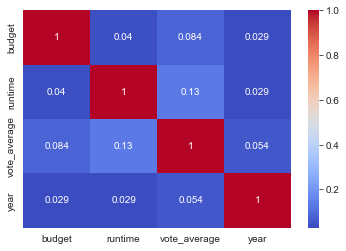

In [7]:
import seaborn as sb

corr = movies[['budget', 'runtime', 'vote_average', 'year']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
movies = movies.loc[movies['revenue'].round(0).astype(int) != 0]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17497 entries, 0 to 773711
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 17497 non-null  int32   
 1   title              17497 non-null  object  
 2   genres             17182 non-null  object  
 3   original_language  17497 non-null  category
 4   budget             17497 non-null  float32 
 5   revenue            17497 non-null  float32 
 6   runtime            17415 non-null  float32 
 7   vote_average       17497 non-null  float32 
 8   year               17497 non-null  int32   
dtypes: category(1), float32(4), int32(2), object(2)
memory usage: 859.7+ KB


In [10]:
numeric_columns = movies.select_dtypes(include=['number']).columns

means = movies[numeric_columns].mean()

movies[numeric_columns] = movies[numeric_columns].fillna(means)

movies.dropna(inplace=True)

In [11]:

X = movies[['budget', 'runtime', 'vote_average', 'genres', 'year', 'original_language']] #original_language
Y = movies[['revenue']]



In [12]:
res = X.genres.str.get_dummies(sep='-').add_prefix('genres_')

X = pd.concat([X, res], axis = 1)
X.drop(columns=['genres'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 773711
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   budget                  17182 non-null  float32 
 1   runtime                 17182 non-null  float32 
 2   vote_average            17182 non-null  float32 
 3   year                    17182 non-null  int32   
 4   original_language       17182 non-null  category
 5   genres_Action           17182 non-null  int64   
 6   genres_Adventure        17182 non-null  int64   
 7   genres_Animation        17182 non-null  int64   
 8   genres_Comedy           17182 non-null  int64   
 9   genres_Crime            17182 non-null  int64   
 10  genres_Documentary      17182 non-null  int64   
 11  genres_Drama            17182 non-null  int64   
 12  genres_Family           17182 non-null  int64   
 13  genres_Fantasy          17182 non-null  int64   
 14  genres_History       

,budget,runtime,vote_average,year,original_language,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,200000000.0,142.0,6.8,2022,en,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75000000.0,105.0,6.4,2022,en,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,110000000.0,122.0,7.7,2022,en,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,74000000.0,112.0,6.8,2022,en,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,114.0,7.3,2022,en,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
lang = X.original_language.str.get_dummies(sep='-').add_prefix('language_')

X = pd.concat([X, lang], axis = 1)
X.drop(columns=['original_language'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 773711
Columns: 103 entries, budget to language_zh
dtypes: float32(3), int32(1), int64(99)
memory usage: 13.4 MB


,budget,runtime,vote_average,year,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,...,language_tg,language_th,language_tl,language_tr,language_uk,language_ur,language_vi,language_xh,language_xx,language_zh
0,200000000.0,142.0,6.8,2022,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75000000.0,105.0,6.4,2022,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110000000.0,122.0,7.7,2022,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74000000.0,112.0,6.8,2022,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,114.0,7.3,2022,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = X.astype({col: 'int32' for col in X.select_dtypes('int64').columns})

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 773711
Columns: 103 entries, budget to language_zh
dtypes: float32(3), int32(100)
memory usage: 6.9 MB


In [15]:
import scipy.stats as st

columns = [
    'budget',
    'runtime',
    'vote_average',
    'year'
]

for column in columns:
    _, p = st.kstest(X[column], 'norm')
    if p > 0.05:
        print(column + ' should be removed from analysis')
    else:
        print(column + ' is important factor')

budget is important factor
runtime is important factor
vote_average is important factor
year is important factor


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [17]:
LinReg = LinearRegression().fit(X_train, Y_train)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PolReg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
PolReg2.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [19]:
models = [LinReg,
          PolReg2]

In [20]:
from sklearn.metrics import r2_score
from numpy import sqrt

RSE_scores = []
R2_scores = []

for model in models:
    y_true = np.array(Y_test)
    y_predicted = np.array(model.predict(X_test))
    RSE_scores.append(sqrt((np.sum(np.square(y_true - y_predicted)))/(len(y_true) - 2)))
    R2_scores.append(r2_score(Y_test, y_predicted))

print('RSE: ', RSE_scores)
print('R2: ', R2_scores)
print('RSE index min: ', np.argmin(RSE_scores) +1, RSE_scores[np.argmin(RSE_scores)])
print('R2 index max: ', np.argmax(R2_scores) + 1, R2_scores[np.argmax(R2_scores)])

RSE:  [75071023.76991566, 73595229.7707788]
R2:  [0.572431538384719, 0.5890771257060914]
RSE index min:  2 73595229.7707788
R2 index max:  2 0.5890771257060914
